In [1]:
from BubbleGraph import BubbleGraph
from max_score_multiple_BG import max_score_many_memo
import numpy as np
import time
from matplotlib import pyplot as plt

In [2]:
def max_score_multiple(bg: BubbleGraph, l, n: int):
    i = 0
    final_steps = []
    final_score = 0
    while i < len(l):
        steps, bg, score = max_score_many_memo(bg, l[i:i + n])
        i += n
        final_steps += steps
        final_score += score
    return final_steps, bg, final_score

In [3]:
ns = [1, 2, 3, 4, 5, 6, 7, 8]

In [4]:
times = []
scores = []

for i in range(1, 100):
    print(f'Iteration {i}')
    bg = BubbleGraph.random_graph(7, 7, 6, 1)
    l = np.random.randint(1, 6, 8)
    score = []
    elapsed = []
    for n in ns:
        curr_time = time.perf_counter()
        _, _, final_score = max_score_multiple(bg, l, n)
        score.append(final_score)
        elapsed.append(time.perf_counter() - curr_time)
    
    times.append(elapsed)
    scores.append(score)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

In [5]:
sum_score = np.sum(scores, axis=0)
sum_time = np.sum(times, axis=0)

In [6]:
sum_score

array([18780., 21230., 21980., 24875., 25535., 26705., 27900., 29900.])

In [7]:
sum_time

array([1.12958170e+00, 4.00499310e+00, 1.21756521e+01, 7.49984886e+01,
       7.47844995e+01, 2.54589851e+02, 1.01592883e+03, 4.38512953e+03])

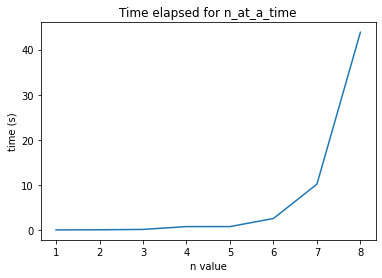

In [12]:
fig, ax = plt.subplots()
ax.plot(ns, sum_time / 100)
ax.set(xlabel='n value', ylabel='time (s)', title='Time elapsed for n_at_a_time')
fig.savefig('time_n_at_a_time.png')
plt.show()

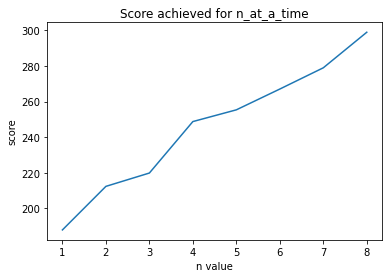

In [13]:
fig, ax = plt.subplots()
ax.plot(ns, sum_score / 100)
ax.set(xlabel='n value', ylabel='score', title='Score achieved for n_at_a_time')
fig.savefig('score_n_at_a_time.png')
plt.show()

In [14]:
sum_time / 100

array([1.12958170e-02, 4.00499310e-02, 1.21756521e-01, 7.49984886e-01,
       7.47844995e-01, 2.54589851e+00, 1.01592883e+01, 4.38512953e+01])

In [15]:
sum_score / 100

array([187.8 , 212.3 , 219.8 , 248.75, 255.35, 267.05, 279.  , 299.  ])

Visualize the 2 approaches

In [67]:
steps_bt, steps_n = 0, 0
while steps_bt == steps_n:
    bg = BubbleGraph.random_graph(10, 10, 6, 2)
    l = np.random.randint(1, 6, 4)

    steps_bt, bg_bt, score_bt = max_score_many_memo(bg, l)

    steps_n, bg_n, score_n = max_score_multiple(bg, l, 2)

In [68]:
score_bt, score_n

(210.0, 175.0)

In [57]:
from GUI import GUI
from pop_bubbles_BG import bubbles_popped

def visualize_steps(bg, l, steps, filename):
    gui = GUI()
    
    gui.load_queue(l[1:])
    gui.load_bubble(l[0])
    gui.load_matrix(bg.matrix)
    gui.show(save_fig=True, fpath=f'{filename}_0.png')
    
    for i in range(len(l)):
        bg, _ = bubbles_popped(bg, steps[i], l[i])
        gui.load_queue(l[i + 2:])
        if i < len(l) - 1:
            gui.load_bubble(l[i + 1])
        else:
            gui.load_bubble(-1)
            
        gui.load_matrix(bg.matrix)
        gui.show(save_fig=True, fpath=f'{filename}_{i + 1}.png')
        

In [69]:
visualize_steps(bg, l, steps_bt, 'backtrack')

In [70]:
visualize_steps(bg, l, steps_n, 'n')

In [71]:
steps_bt

[(8, 9), (8, 4), (8, 8), (8, 1)]

In [72]:
steps_n

[(8, 8), (8, 8), (8, 4), (8, 1)]